To predict the blooming day of year for Vancouver for years between 2023 and 2031, the GAM is considered. The rationale is to extract as much as information from given small number of features using cubic natural spline function. We first would show how the GAM for bloom_doy with each of individual features look like and show how well they perform comapred to the simple linear model

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('./data')
import scipy
import matplotlib.pyplot as plt
df = pd.read_csv('./lee.csv')
y = df.bloom_doy

In [2]:
from pygam import LinearGAM, s, l, te, f
import pygam

In [3]:
# suppress 'FutureWarning' messages
import warnings
warnings.filterwarnings('ignore')

### GAM for year

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


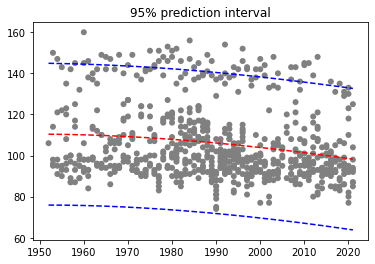

In [4]:
X = df[['year']].to_numpy()

gam = LinearGAM(n_splines=4).gridsearch(X, y)

XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');

In [5]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.6984
Link Function:                     IdentityLink Log Likelihood:                                 -4781.4772
Number of Samples:                          720 AIC:                                             9570.3512
                                                AICc:                                            9570.3998
                                                GCV:                                              307.0884
                                                Scale:                                            305.0175
                                                Pseudo R-Squared:                                   0.0399
Feature Function                  Lam

### GAM for longitude

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


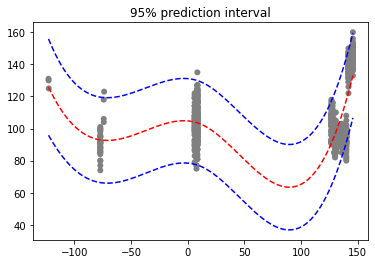

In [6]:
X = df[['long']].to_numpy()

gam = LinearGAM(n_splines=5).gridsearch(X, y)

XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');

In [7]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      4.9189
Link Function:                     IdentityLink Log Likelihood:                                 -4398.6377
Number of Samples:                          720 AIC:                                             8809.1134
                                                AICc:                                            8809.2282
                                                GCV:                                              181.2492
                                                Scale:                                            179.0216
                                                Pseudo R-Squared:                                   0.4383
Feature Function                  Lam

### GAM for altitude

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


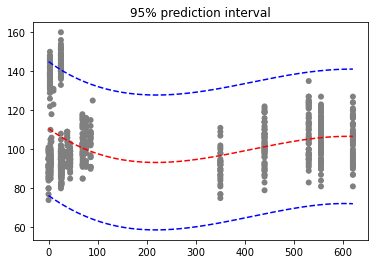

In [8]:
X = df[['alt']].to_numpy()

gam = LinearGAM(n_splines=4).gridsearch(X, y)

XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');

In [9]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.9204
Link Function:                     IdentityLink Log Likelihood:                                 -4780.2494
Number of Samples:                          720 AIC:                                             9570.3396
                                                AICc:                                            9570.4212
                                                GCV:                                              307.5102
                                                Scale:                                            304.4978
                                                Pseudo R-Squared:                                   0.0432
Feature Function                  Lam

### GAM for latitude

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


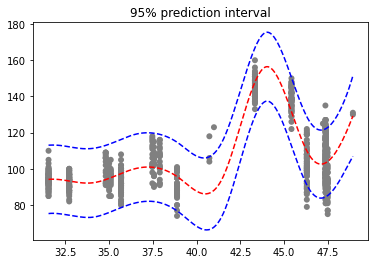

In [10]:
X = df[['lat']].to_numpy()

gam = LinearGAM(n_splines=10).gridsearch(X, y)

XX = gam.generate_X_grid(term=0, n=500)

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval');

In [11]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.7293
Link Function:                     IdentityLink Log Likelihood:                                 -3914.6298
Number of Samples:                          720 AIC:                                             7850.7181
                                                AICc:                                            7851.0735
                                                GCV:                                               93.4316
                                                Scale:                                             91.1619
                                                Pseudo R-Squared:                                   0.7159
Feature Function                  Lam

### Final GAM model

In [12]:
X = df[['year','lat','long','alt']].to_numpy()
gam = LinearGAM(s(0, n_splines=4) + s(1, n_splines=10) + s(2, n_splines = 5) + s(3, n_splines = 4))
gam.fit(X, y)


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [13]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.3197
Link Function:                     IdentityLink Log Likelihood:                                  -3722.181
Number of Samples:                          720 AIC:                                             7467.0015
                                                AICc:                                            7467.3956
                                                GCV:                                               71.5064
                                                Scale:                                             69.6639
                                                Pseudo R-Squared:                                   0.7831
Feature Function                  Lam

### y vs. prediction scatter plot

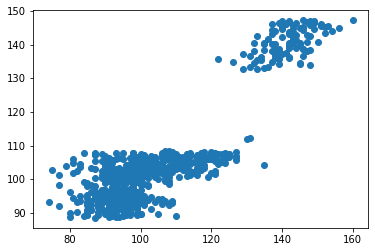

In [14]:
# y vs predict of y plot
plt.scatter(y, gam.predict(X))

### Finding MSE and compare the performance with the simple linear model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
gam = LinearGAM(s(0, n_splines=4) + s(1, n_splines=10) + s(2, n_splines = 5) + s(3, n_splines = 4))
gam.fit(X_train, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [17]:
MSE = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    gam = LinearGAM(s(0, n_splines=4) + s(1, n_splines=10) + s(2, n_splines = 5) + s(3, n_splines = 4))
    gam.fit(X_train, y_train)
    mse= np.sqrt(((gam.predict(X_test)-y_test)**2).sum()/X_test.shape[0])
    MSE.append(mse)

#### mean of RMSE and its variance

In [18]:
np.mean(MSE), np.var(MSE)

(8.513498469128047, 0.13529989872030784)

#### Simple linear model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
X = df[['year','lat','long','alt']].copy()
X['year.sq'] = X['year']*X['year']
X = X.to_numpy()

In [22]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error, greater_is_better = False )
cv = ShuffleSplit(n_splits=20, test_size=0.3)
scorelin = cross_val_score(regressor, X, y, cv = cv, scoring = mse)

In [23]:
np.sqrt(abs(scorelin)).mean(), np.sqrt(abs(scorelin)).var()

(10.529020008718122, 0.22689586730860997)

### GAM performs better than linear regression

# Prediction

In [24]:
year = np.arange(2023, 2032, 1)
lat = np.repeat(47.4814, 9)
long = np.repeat(7.730519, 9)
alt = np.repeat(350, 9)

In [25]:
X_test = pd.DataFrame(zip(year, lat, long, alt), columns = ['year','lat','long','alt'])
X_test = X_test.to_numpy()

In [26]:
X = df[['year','lat','long','alt']].to_numpy()
gam = LinearGAM(s(0, n_splines=4) + s(1, n_splines=10) + s(2, n_splines = 5) + s(3, n_splines = 4))
gam.fit(X, y)



LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [27]:
gam.predict(X_test)

array([97.70844916, 97.5278414 , 97.34723363, 97.16662587, 96.9860181 ,
       96.80541034, 96.62480257, 96.44419481, 96.26358704])